In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import mysql.connector as sql

Build the SQL connection

In [3]:
db_connection = sql.connect(host = 'wcd-sql-class.c0h2bhc51r9d.us-east-1.rds.amazonaws.com', \
                            database = 'credit', user = 'student4', password = 'noisybutter764')

In [3]:
test_query = '''
select credit_type, count(*), count(distinct sk_id_curr)
from bureau
group by 1 limit 100;
'''

In [4]:
test_query_result = pd.read_sql(sql = test_query, con = db_connection)

In [5]:
test_query_result

,credit_type,count(*),count(distinct sk_id_curr)
0,Another type of loan,1017,962
1,Car loan,27690,22796
2,Cash loan (non-earmarked),56,51
3,Consumer credit,1251615,286669
4,Credit card,402195,199965
5,Interbank credit,1,1
6,Loan for business development,1975,1599
7,Loan for purchase of shares (margin lending),4,4
8,Loan for the purchase of equipment,19,18
9,Loan for working capital replenishment,469,414


In [6]:
df_query = '''
select
base.*,
base2.status_c_mean,
base2.status_x_mean,
base2.status_0_mean,
base2.status_1_mean,
base2.status_2_mean,
base2.status_3_mean,
base2.status_4_mean,
base2.status_5_mean,
base3.num_of_app,
base3.num_of_ref,
base3.avg_APP_CREDIT_PERC
from
(select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
b.NEW_AVG_INC_BY_ORG,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join
(select ORGANIZATION_TYPE, avg(AMT_INCOME_TOTAL) as NEW_AVG_INC_BY_ORG
from application group by 1) as b
on a.ORGANIZATION_TYPE=b.ORGANIZATION_TYPE
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR) as base
left join
(select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1) as base2 
on base.SK_ID_CURR=base2.SK_ID_CURR
left join
(select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1) base3
on base.SK_ID_CURR=base3.SK_ID_CURR
'''

In [ ]:
df = pd.read_sql(sql = df_query, con = db_connection)

Since it takes too long to implement the long sql query. We need to break it down into smaller components.

In [4]:
query1 = '''
select
base1.*
from
(select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
b.NEW_AVG_INC_BY_ORG,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join
(select ORGANIZATION_TYPE, avg(AMT_INCOME_TOTAL) as NEW_AVG_INC_BY_ORG
from application group by 1) as b
on a.ORGANIZATION_TYPE=b.ORGANIZATION_TYPE
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR) as base1
'''

In [5]:
query2 = '''
select
base2.SK_ID_CURR,
base2.status_c_mean,
base2.status_x_mean,
base2.status_0_mean,
base2.status_1_mean,
base2.status_2_mean,
base2.status_3_mean,
base2.status_4_mean,
base2.status_5_mean
from
(select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1) as base2
'''

In [6]:
query3 = '''
select
base3.SK_ID_CURR,
base3.num_of_app,
base3.num_of_ref,
base3.avg_APP_CREDIT_PERC
from
(select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null end) as avg_APP_CREDIT_PERC
from previous_application group by 1) base3
'''

In [7]:
base1 = pd.read_sql(sql = query1, con = db_connection)

In [8]:
base2 = pd.read_sql(sql = query2, con = db_connection)

In [9]:
base3 = pd.read_sql(sql = query3, con = db_connection)

In [16]:
base1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,cl_max_CREDIT_DAY_OVERDUE,ac_max_CREDIT_DAY_OVERDUE,sd_max_CREDIT_DAY_OVERDUE,bd_max_CREDIT_DAY_OVERDUE,cl_avg_CREDIT_DAY_OVERDUE,ac_avg_CREDIT_DAY_OVERDUE,sd_avg_CREDIT_DAY_OVERDUE,bd_avg_CREDIT_DAY_OVERDUE,bd_flag,bd_num
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0


In [19]:
base1.shape

(307511, 151)

In [31]:
base2.head()

,SK_ID_CURR,status_c_mean,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean
0,100002,0.2091,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0
1,100010,0.7222,0.0000,0.2778,0.0000,0.0,0.0,0.0,0.0
2,100019,0.0000,0.0588,0.9412,0.0000,0.0,0.0,0.0,0.0
3,100032,0.0000,0.1053,0.8947,0.0000,0.0,0.0,0.0,0.0
4,100033,0.0000,0.8571,0.1429,0.0000,0.0,0.0,0.0,0.0


In [32]:
base2.shape

(92231, 9)

In [33]:
base3.head()

,SK_ID_CURR,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100001,1.0,0.0,1.044079
1,100002,1.0,0.0,1.000000
2,100003,3.0,0.0,0.949329
3,100004,1.0,0.0,1.207699
4,100005,1.0,0.0,1.111173


In [34]:
base3.shape

(338857, 4)

Since the SQL data pulls were complex and took quite some time to execute, we would want to back up the SQL data pull results.

In [ ]:
base1.to_csv('base1.csv', sep = '|', index = False)

In [ ]:
base2.to_csv('base2.csv', sep = '|', index = False)

In [ ]:
base3.to_csv('base3.csv', sep = '|', index = False)

Now, we will join the seperate data frames into one dataset

In [10]:
df_merge = base1.merge(base2, how = 'left', on = 'SK_ID_CURR')

In [11]:
df_final = df_merge.merge(base3, how = 'left', on = 'SK_ID_CURR')

In [37]:
df_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650


In [38]:
df_final.shape

(307511, 162)

In [ ]:
df_final.to_csv('df_final', sep = '|', index = False)

Next, we're going to check for missing values in the final dataset.

In [12]:
# Final total number of missing values for each column

mis_val = df_final.isnull().sum()
mis_val

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
                        ...  
status_4_mean          215280
status_5_mean          215280
num_of_app              16454
num_of_ref              16454
avg_APP_CREDIT_PERC     17455
Length: 162, dtype: int64

In [13]:
# Calculate percentage of missing values for each column

mis_val_perc = mis_val / len(df_final) * 100
mis_val_perc

SK_ID_CURR              0.000000
TARGET                  0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
                         ...    
status_4_mean          70.007252
status_5_mean          70.007252
num_of_app              5.350703
num_of_ref              5.350703
avg_APP_CREDIT_PERC     5.676220
Length: 162, dtype: float64

In [14]:
# Concatenate the mis_val and mis_val_perc, and rename:

mis_val_tab = pd.concat([mis_val, mis_val_perc], axis = 1, keys = ['No. of Missing Values', 'Missing Value %'])
mis_val_tab

,No. of Missing Values,Missing Value %
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In [15]:
# Select out columns with non-zero missing values

mis_val_only = mis_val_tab.loc[mis_val_tab['Missing Value %'] > 0]
mis_val_only

,No. of Missing Values,Missing Value %
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In this step, we're going to automate the process of summarizing number and percentage of missing values.

In [16]:
def summarize_missing_values(df):
    mis_val = df.isnull().sum()
    
    mis_val_perc = mis_val / len(df) * 100
    
    mis_val_tab = pd.concat([mis_val, mis_val_perc], axis = 1, keys = ['No. of Missing Values', 'Missing Value %'])
    
    mis_val_only = mis_val_tab.loc[mis_val_tab['Missing Value %'] > 0]
    
    return mis_val_only

In [17]:
mis_val_only = summarize_missing_values(df_final)
mis_val_only

,No. of Missing Values,Missing Value %
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In common practice, there are three ways to deal with missing values:
1. Imputation
2. Create missing flags
3. Drop columns with high percentage of missing values

There are no hard well-established threshold of missing value percentage to drop the columns since this requires judgement depending on the specific case. In this case, we are going to choose a percentage of 70%. This percentage is high enough so that we may not unintentionally drop columns that contain useful information. And since columns with this high percentage of missing values usually don't add much values to the model predictive performance. At the same time, with the sheer total number of 162 columns, this will also help us reduce the number of columns to manageable amount.

In [18]:
# Select out columns with at least 70% of missing values

missing_over_70 = mis_val_only.loc[mis_val_only['Missing Value %'] > 70]
missing_over_70

,No. of Missing Values,Missing Value %
sd_max_DAYS_CREDIT,302285,98.300549
sd_min_DAYS_CREDIT,302285,98.300549
sd_avg_DAYS_CREDIT,302285,98.300549
bd_max_DAYS_CREDIT,307491,99.993496
bd_min_DAYS_CREDIT,307491,99.993496
bd_avg_DAYS_CREDIT,307491,99.993496
sd_max_CREDIT_DAY_OVERDUE,302285,98.300549
bd_max_CREDIT_DAY_OVERDUE,307491,99.993496
sd_avg_CREDIT_DAY_OVERDUE,302285,98.300549
bd_avg_CREDIT_DAY_OVERDUE,307491,99.993496


In [19]:
# Get the column names

[list(missing_over_70.index)]

[['sd_max_DAYS_CREDIT',
  'sd_min_DAYS_CREDIT',
  'sd_avg_DAYS_CREDIT',
  'bd_max_DAYS_CREDIT',
  'bd_min_DAYS_CREDIT',
  'bd_avg_DAYS_CREDIT',
  'sd_max_CREDIT_DAY_OVERDUE',
  'bd_max_CREDIT_DAY_OVERDUE',
  'sd_avg_CREDIT_DAY_OVERDUE',
  'bd_avg_CREDIT_DAY_OVERDUE',
  'status_c_mean',
  'status_x_mean',
  'status_0_mean',
  'status_1_mean',
  'status_2_mean',
  'status_3_mean',
  'status_4_mean',
  'status_5_mean']]

In [20]:
# Drop those columns from the dataset

df_after_drop = df_final.drop(columns = list(missing_over_70.index))
df_after_drop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ac_avg_DAYS_CREDIT,cl_max_CREDIT_DAY_OVERDUE,ac_max_CREDIT_DAY_OVERDUE,cl_avg_CREDIT_DAY_OVERDUE,ac_avg_CREDIT_DAY_OVERDUE,bd_flag,bd_num,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-572.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-606.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,6.0,0.0,0.969650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.000000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.013622
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-816.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.225448
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,2.0,0.0,0.891418


In [105]:
# 18 columns with more than 70% missing values were removed

print(df_final.shape)
print(df_after_drop.shape)

(307511, 162)
(307511, 144)


In [21]:
# Let's take a second look at the missing values of the remaining columns

mis_col_remain = summarize_missing_values(df_after_drop)
mis_col_remain

,No. of Missing Values,Missing Value %
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
bd_flag,44020,14.314935
bd_num,44020,14.314935
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In [22]:
# Get the data types of these remaining columns with missing values

df_after_drop[list(mis_col_remain.index)].dtypes

AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
OWN_CAR_AGE            float64
OCCUPATION_TYPE         object
                        ...   
bd_flag                float64
bd_num                 float64
num_of_app             float64
num_of_ref             float64
avg_APP_CREDIT_PERC    float64
Length: 86, dtype: object

Next, we will do imputations for missing values in the remaining columns. Imputation methods depend on the types of data. Numeric missing values are most commonly imputed with mean or median methods. For categorical values, imputation involves encoding.

In [23]:
# We're going to use the SimpleImputer class of sklearn package

from sklearn.impute import SimpleImputer
import numpy as np

In [24]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

First, we're going to test the imputer on a column

In [25]:
# Get the mean of column 'AMT_ANNUITY'

df_after_drop['AMT_ANNUITY'].mean()

27108.573909183444

In [26]:
df_after_drop['AMT_ANNUITY'].loc[df_after_drop['AMT_ANNUITY'].isnull()]

47531    NaN
50035    NaN
51594    NaN
55025    NaN
59934    NaN
75873    NaN
89343    NaN
123872   NaN
207186   NaN
227939   NaN
239329   NaN
241835   NaN
Name: AMT_ANNUITY, dtype: float64

In [27]:
df_after_drop.loc[47531, 'AMT_ANNUITY']

nan

In [28]:
# Fit the imputer on the column

imp_mean.fit(df_after_drop[['AMT_ANNUITY']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [29]:
# Transform the column

df_after_drop[['AMT_ANNUITY']] = imp_mean.transform(df_after_drop[['AMT_ANNUITY']])
df_after_drop[['AMT_ANNUITY']]

,AMT_ANNUITY
0,24700.5
1,35698.5
2,6750.0
3,29686.5
4,21865.5
...,...
307506,27558.0
307507,12001.5
307508,29979.0
307509,20205.0


In [30]:
df_after_drop['AMT_ANNUITY'].isnull().sum()

0

In [31]:
df_after_drop.loc[47531, 'AMT_ANNUITY']

27108.573909183444

Since we've seen that the imputer worked as expected, we're going to apply it to the entire dataset

In [32]:
df_after_drop.dtypes == 'float64'

SK_ID_CURR             False
TARGET                 False
NAME_CONTRACT_TYPE     False
CODE_GENDER            False
FLAG_OWN_CAR           False
                       ...  
bd_flag                 True
bd_num                  True
num_of_app              True
num_of_ref              True
avg_APP_CREDIT_PERC     True
Length: 144, dtype: bool

In [33]:
for col in list(mis_col_remain.index):
    if df_after_drop[col].dtypes == 'float64':
        df_after_drop[[col]] = imp_mean.fit_transform(df_after_drop[[col]])

In [34]:
df_after_drop.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
                      ..
bd_flag                0
bd_num                 0
num_of_app             0
num_of_ref             0
avg_APP_CREDIT_PERC    0
Length: 144, dtype: int64

In [35]:
summarize_missing_values(df_after_drop)

,No. of Missing Values,Missing Value %
NAME_TYPE_SUITE,1292,0.420148
OCCUPATION_TYPE,96391,31.345545
FONDKAPREMONT_MODE,210295,68.386172
HOUSETYPE_MODE,154297,50.176091
WALLSMATERIAL_MODE,156341,50.840783
EMERGENCYSTATE_MODE,145755,47.398304


Let's check the remaining categorical variables

In [42]:
df_after_drop['NAME_TYPE_SUITE'].value_counts(dropna = False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [43]:
df_after_drop['OCCUPATION_TYPE'].value_counts(dropna = False)

NaN                96391
Laborers           55186
Sales staff        32102
Core staff         27570
Managers           21371
Drivers            18603
High skill tech    11380
Accountants         9813
Medicine staff      8537
Security staff      6721
Cooking staff       5946
Cleaning staff      4653
Private service     2652
Low-skill Labor     2093
Waiters/barmen      1348
Secretaries         1305
Realty agents        751
HR staff             563
IT staff             526
Name: OCCUPATION_TYPE, dtype: int64

In [44]:
df_after_drop['FONDKAPREMONT_MODE'].value_counts(dropna = False)

NaN                      210295
reg oper account          73830
reg oper spec account     12080
not specified              5687
org spec account           5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [45]:
df_after_drop['HOUSETYPE_MODE'].value_counts(dropna = False)

NaN                154297
block of flats     150503
specific housin      1499
terraced house       1212
Name: HOUSETYPE_MODE, dtype: int64

In [46]:
df_after_drop['WALLSMATERIAL_MODE'].value_counts(dropna = False)

NaN             156341
Panel            66040
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [47]:
df_after_drop['EMERGENCYSTATE_MODE'].value_counts(dropna = False)

No     159428
NaN    145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

Deal with categorial variables:

Since most machine learning algorithms cannot handle categorical variables, we need to transform these data in some ways that we can utilize their information. Two common methods are labeling encoding and one-hot encoding.
1. Labeling encoding: assign each unique category in each categorical variable a integer. No new columns are created
2. One-hot encoding: create a new column for each unique category of a categorical variable. Each observation receives a 1 for its coresponding categorical column and zeros for all other new columns.

The disadvantage of labeling encoding is that it will introduce artifical ranking which we may not neccessarily want. On the other hand, one-hot encoding creates a lot of new columns which may increase the column sizes significantly. However, the benefit of using one-hot encoding outweigh its weakness. Therefore, we're going to use one-hot encoding to develop our model.

In [53]:
# Find all the categorical columns

cat_cols = [col for col in df_after_drop.columns if df_after_drop[col].dtypes == 'object']
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [55]:
# Let's drop categorical columns that are not very informative based on our judegements

df_after_drop = \
df_after_drop.drop(columns = ['NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', \
                              'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE'])

In [57]:
cat_cols = [col for col in df_after_drop.columns if df_after_drop[col].dtypes == 'object']
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE']

Next, we're going to do one-hot encoding

In [58]:
df_after_drop = pd.get_dummies(data = df_after_drop, columns = cat_cols, dummy_na = False)

In [59]:
df_after_drop

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housin,HOUSETYPE_MODE_terraced house,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,1,0,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,1,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,1,0,0,1,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,1,1,0,0,1,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,1,0,0,1,0


In [60]:
summarize_missing_values(df_after_drop)

,No. of Missing Values,Missing Value %


Correlations:

The 'Target' column in the dataset is the label result of whether a person defaults on their loan or not. So we will use it as the label for our model training. But first, we will need to find columns that are best correlated with the 'Target' column and sort the columns based on their relative correlations

In [61]:
# Create a correlation matrix from the dataset

df_after_drop.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housin,HOUSETYPE_MODE_terraced house,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,1.000000,-0.002108,-0.001129,0.000892,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,-0.002568,-0.000669,0.002658,-0.000496,0.001368,0.001254,0.001344,0.000553,0.000510,0.002549
TARGET,-0.002108,1.000000,0.019187,-0.019938,-0.030369,-0.012817,-0.039628,-0.037227,0.078239,-0.044932,...,-0.000839,0.017552,0.005929,-0.007672,-0.045987,-0.040594,0.005311,0.000982,-0.042201,0.004829
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.025766,0.002145,0.021374,-0.001826,-0.025573,0.330938,-0.239818,...,0.021024,0.004209,0.011959,-0.000854,-0.240722,-0.036400,-0.001821,-0.001830,-0.038644,0.004525
AMT_INCOME_TOTAL,0.000892,-0.019938,0.025766,1.000000,0.351978,0.428704,0.358480,0.169986,0.058498,-0.142409,...,0.005649,0.004216,0.028135,0.011678,-0.141961,0.108158,-0.004038,0.001840,0.109761,-0.006175
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.351978,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,...,0.000133,-0.009990,0.012154,0.017552,-0.065594,0.057524,-0.005219,0.000869,0.058256,-0.004308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOUSETYPE_MODE_block of flats,0.001254,-0.040594,-0.036400,0.108158,0.057524,0.066793,0.061895,0.106941,-0.019805,-0.009500,...,0.001335,-0.004191,0.011745,0.015138,-0.009131,1.000000,-0.068524,-0.061587,0.915009,0.079225
HOUSETYPE_MODE_specific housin,0.001344,0.005311,-0.001821,-0.004038,-0.005219,-0.004961,-0.005218,-0.012809,0.009693,-0.013120,...,0.001249,0.001667,0.001666,-0.001758,-0.013114,-0.068524,1.000000,-0.004403,0.065958,0.002506
HOUSETYPE_MODE_terraced house,0.000553,0.000982,-0.001830,0.001840,0.000869,0.002166,0.000796,0.011212,0.000388,-0.001761,...,0.002039,0.000269,-0.001690,0.002985,-0.001789,-0.061587,-0.004403,1.000000,0.053146,0.037618
EMERGENCYSTATE_MODE_No,0.000510,-0.042201,-0.038644,0.109761,0.058256,0.068144,0.062849,0.103513,-0.019852,-0.010907,...,0.001801,-0.003820,0.010131,0.016683,-0.010526,0.915009,0.065958,0.053146,1.000000,-0.090624


In [64]:
# Let's look at correlations for 'Target' column and sort the results

correlations = df_after_drop.corr()['TARGET'].sort_values(ascending = False)
correlations

TARGET                                  1.000000
DAYS_BIRTH                              0.078239
NEW_CREDIT_TO_GOODS_RATIO               0.069397
num_of_ref                              0.063142
REGION_RATING_CLIENT_W_CITY             0.060893
                                          ...   
CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.099152
EXT_SOURCE_3                           -0.157397
EXT_SOURCE_2                           -0.160303
Name: TARGET, Length: 243, dtype: float64

In [66]:
# Display the correlations in a meaningful way:

print('Most positive correlations:\n', correlations.head(15))
print('\nMost negative correlations:\n', correlations.tail(15))

Most positive correlations:
 TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
NEW_CREDIT_TO_GOODS_RATIO                            0.069397
num_of_ref                                           0.063142
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
ac_avg_DAYS_CREDIT                                   0.054117
DAYS_ID_PUBLISH                                      0.051457
ac_max_DAYS_CREDIT                                   0.051050
REG_CITY_NOT_WORK_CITY                               0.050994
cl_min_DAYS_CREDIT                                   0.050374
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
Name: TARGET, dtype: float64

Most negati

At this stage, let's backup our cleaned, imputed, and encoded dataset

In [ ]:
df_after_drop.to_csv('df_cln_imp_enc.csv', sep = '|', index = False)

Train/Test Split:

In [67]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [68]:
# Create training and testing vars

y = df_after_drop['TARGET']

X_train, X_test, y_train, y_test = train_test_split(df_after_drop, y, test_size = 0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(230633, 243)
(76878, 243)
(230633,)
(76878,)


In [72]:
# Drop the 'TARGET' columns from X_train and X_test

X_train = X_train.drop(columns = ['TARGET'])
X_test = X_test.drop(columns = ['TARGET'])

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(230633, 242)
(76878, 242)
(230633,)
(76878,)


Logistic Regression Implementation

In [74]:
# Let's take a quick look at all of the features

list(X_train.columns)

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 

In [77]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 10000)

Train the logistic regression model with the training data

In [78]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

2. Make predictions:

After training the model, now we can use it to predict the probability of default with 'predict_proba' method. The first column is the probability of paying off loans (represented by target equals 0) and the second column is the probability of default (represented by target equals 1)

In [80]:
log_reg_pred = log_reg.predict_proba(X_test)
log_reg_pred

array([[0.97022282, 0.02977718],
       [0.95444721, 0.04555279],
       [0.83875792, 0.16124208],
       ...,
       [0.94259084, 0.05740916],
       [0.95138524, 0.04861476],
       [0.86908616, 0.13091384]])

In [83]:
y_pred_proba = log_reg_pred[:, 1]
y_pred_proba

array([0.02977718, 0.04555279, 0.16124208, ..., 0.05740916, 0.04861476,
       0.13091384])

3. Predict the labels:

We will use '.predict' method to predict y class labels.
sklearn uses a threshold of 0.5 for binary classification.

In [84]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Check key model metrics:

ROC curve is a plot of True Positive Rate vs False Positive Rate where False Positive Rate = FP/(FP+TN) = 1-Specificity

4. Show the ROC curve to evaluate model performance

In [87]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [88]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

In [89]:
# Index of the first threshold for which the sensibility > 0.95

idx = np.min(np.where(tpr > 0.95))

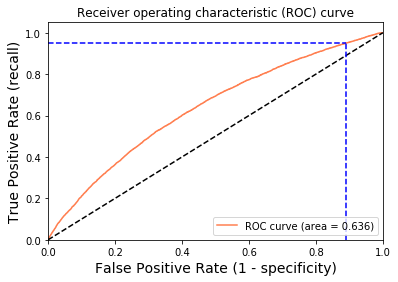

In [90]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

AUROC (Area Under The Receiver Operating Characteristics). Model performance is represented by the area under the ROC curve and this area has a value ranging from 0 to 1. The model performance is optimized when the area under ROC is maximized. In other words, the closer the area to 1 the better the model.

Implement Random Forest Model

Ensemble Learning: in general, is a model that makes predictions based on combining different models together. The more models it integrate, the more flexible ensemble learning model is (less biased) and less data-sensitive (less variance). Two most popular ensemble learning methods are bagging and boosting.

    Bagging: Training many different models simultaneously in a parallel manner. Each model is built upon a random subset of the data. Therefore, bootstrapping and the data plus using the aggregate is the essence of bagging

        Random Forest: is an ensemble model that uses bagging as the ensemble learning method and descision trees to build individual model.

    Boosting: train many different models in a sequentially (one by one). Each model is built from the experience and mistakes of the previous model. 
    
        Gradient Boosting: gradient boosting builds trees one at a time. Each sequnetially new tree helps to correct the errors made by the previously trained tree.


In [91]:
# Create a random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [93]:
rf_model = RandomForestClassifier(n_estimators = 200, max_depth = 5)

1. Train the model

In [94]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

2. Make the probability prediction:

In [95]:
rf_model_pred = rf_model.predict_proba(X_test)
y_pred_proba = rf_model_pred[:, 1]
y_pred_proba

array([0.06102135, 0.05426927, 0.09251531, ..., 0.08828496, 0.0479349 ,
       0.10256813])

3. Predict the labels:

In [96]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

4. Visualize the ROC curve to evaluate model performance

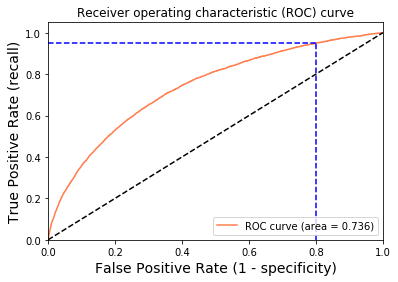

In [98]:
import numpy as np
y_pred_proba=rf_model_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

From the ROC curves, we can see the the more advanced Random Forest performed better than the traditional Logistic Regression model.